In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [2]:
#importing all the necessary libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Data Collection

In [3]:
# Twitter Authentication
consumerKey = "JrkR20mB3NTNbazR1Oj9ouMS0"
consumerSecret = "RmE934K6fogjzNQqyFIgXMn74BdFMJlFgo2hm9afBFev5WNy3s"
accessToken = "1360160626245578753-aF1z1lzcGzjMzpHbqnfZ7Tc5qUpcds"
accessTokenSecret = "ri7jQuHyR67LJRznG88z8SYHra0sHRH92IsnFL8fhpQLm"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:


def percentage(part,whole):
    return 100 * float(part)/float(whole) 

# Search for the Term and define number of tweets #
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

#Sentiment Analysis
for tweet in tweets:
    
    
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    #comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: online classes during COVID
Please enter how many tweets to analyze: 280


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  280
positive number:  32
negative number:  192
neutral number:  56


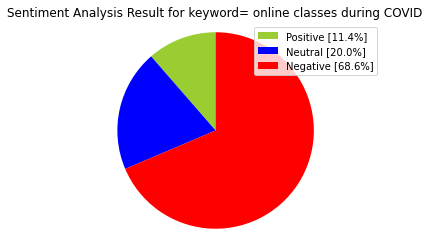

In [6]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis("equal")
plt.show()

In [7]:
tweet_list

,0
0,They have these debates in the UK too. In Jama...
1,"RT @DrNumanOfficial: During pandemic, students..."
2,"RT @DrNumanOfficial: During pandemic, students..."
3,"RT @DrNumanOfficial: During pandemic, students..."
4,"RT @DrNumanOfficial: During pandemic, students..."
...,...
275,RT @Dhirajreddy47: @nidhiindiatv Maam I am 10t...
276,RT @Dhirajreddy47: @EduMinOfIndia @nbt_india @...
277,RT @Dhirajreddy47: @EduMinOfIndia @DrRPNishank...
278,RT @Dhirajreddy47: @EduMinOfIndia @nitsrioffic...


In [8]:
tweet_list.drop_duplicates(inplace = True)

In [9]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,They have these debates in the UK too. In Jama...,they have these debates in the uk too in jama...
1,"RT @DrNumanOfficial: During pandemic, students...",during pandemic students were forced to give...
9,"RT @NadeemRahi20: During pandemic, students we...",during pandemic students were forced to give...
13,"RT @ansa_murtza: During the pandemic, students...",during the pandemic students are forced to g...
14,"RT @MujeebMalik055: During pandemic, students ...",during pandemic students were forced to give...
24,RT @ieeducation_job: Thousands of students who...,thousands of students who were pursuing mbbs...
28,RT @StudentsOfIndi7: @DrRPNishank If we had on...,if we had online classes during the 1st wav...
32,@KTRTRS @KTRoffice @TelanganaCMO @Eatalarajend...,dear kcr garu ktr garu rajendar gar...
33,RT @Dhirajreddy47: @DrRPNishank @PMOIndia @Edu...,sir we are10 12 cbse student duri...
34,RT @Dhirajreddy47: @DrRPNishank @narendramodi ...,india india


In [10]:
#Calculating Negative, Positive & Neutral

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    #comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
   # tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,They have these debates in the UK too. In Jama...,they have these debates in the uk too in jama...,0.0000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,"RT @DrNumanOfficial: During pandemic, students...",during pandemic students were forced to give...,-0.1500,0.171429,negative,0.244,0.756,0.000,-0.6326
9,"RT @NadeemRahi20: During pandemic, students we...",during pandemic students were forced to give...,-0.1500,0.171429,negative,0.233,0.767,0.000,-0.6326
13,"RT @ansa_murtza: During the pandemic, students...",during the pandemic students are forced to g...,-0.0500,0.300000,negative,0.136,0.864,0.000,-0.4588
14,"RT @MujeebMalik055: During pandemic, students ...",during pandemic students were forced to give...,-0.1500,0.171429,negative,0.233,0.767,0.000,-0.6326
24,RT @ieeducation_job: Thousands of students who...,thousands of students who were pursuing mbbs...,-0.2125,0.162500,negative,0.150,0.850,0.000,-0.4588
28,RT @StudentsOfIndi7: @DrRPNishank If we had on...,if we had online classes during the 1st wav...,0.0000,0.000000,negative,0.070,0.930,0.000,-0.1280
32,@KTRTRS @KTRoffice @TelanganaCMO @Eatalarajend...,dear kcr garu ktr garu rajendar gar...,0.6000,0.900000,positive,0.000,0.608,0.392,0.7003
33,RT @Dhirajreddy47: @DrRPNishank @PMOIndia @Edu...,sir we are10 12 cbse student duri...,0.0000,0.000000,neutral,0.000,1.000,0.000,0.0000
34,RT @Dhirajreddy47: @DrRPNishank @narendramodi ...,india india,0.0000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [11]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [12]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,34,37.36
negative,29,31.87
positive,28,30.77


## Word Cloud Visualizations

In [13]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


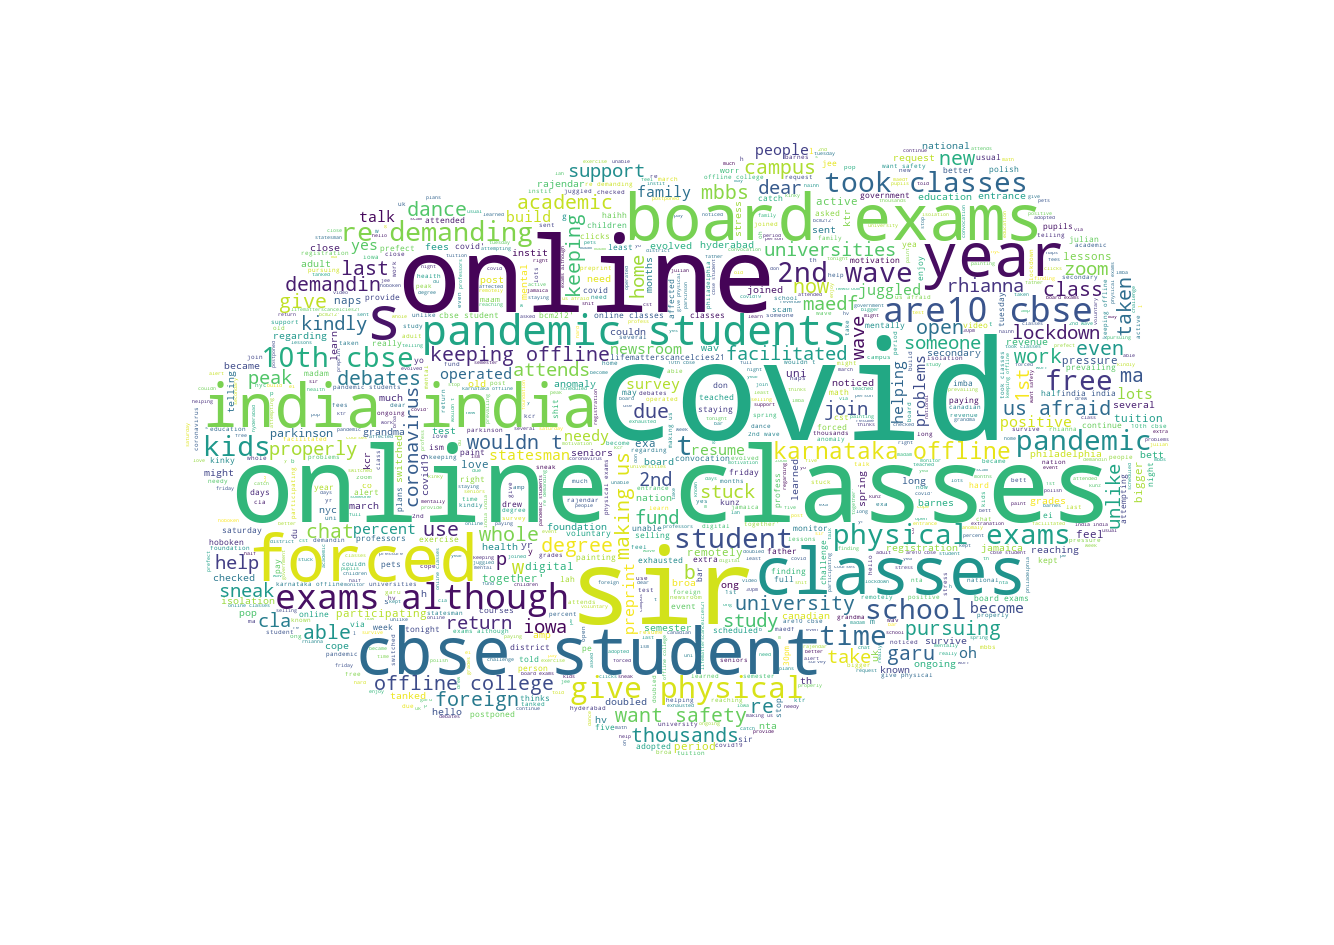

In [14]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


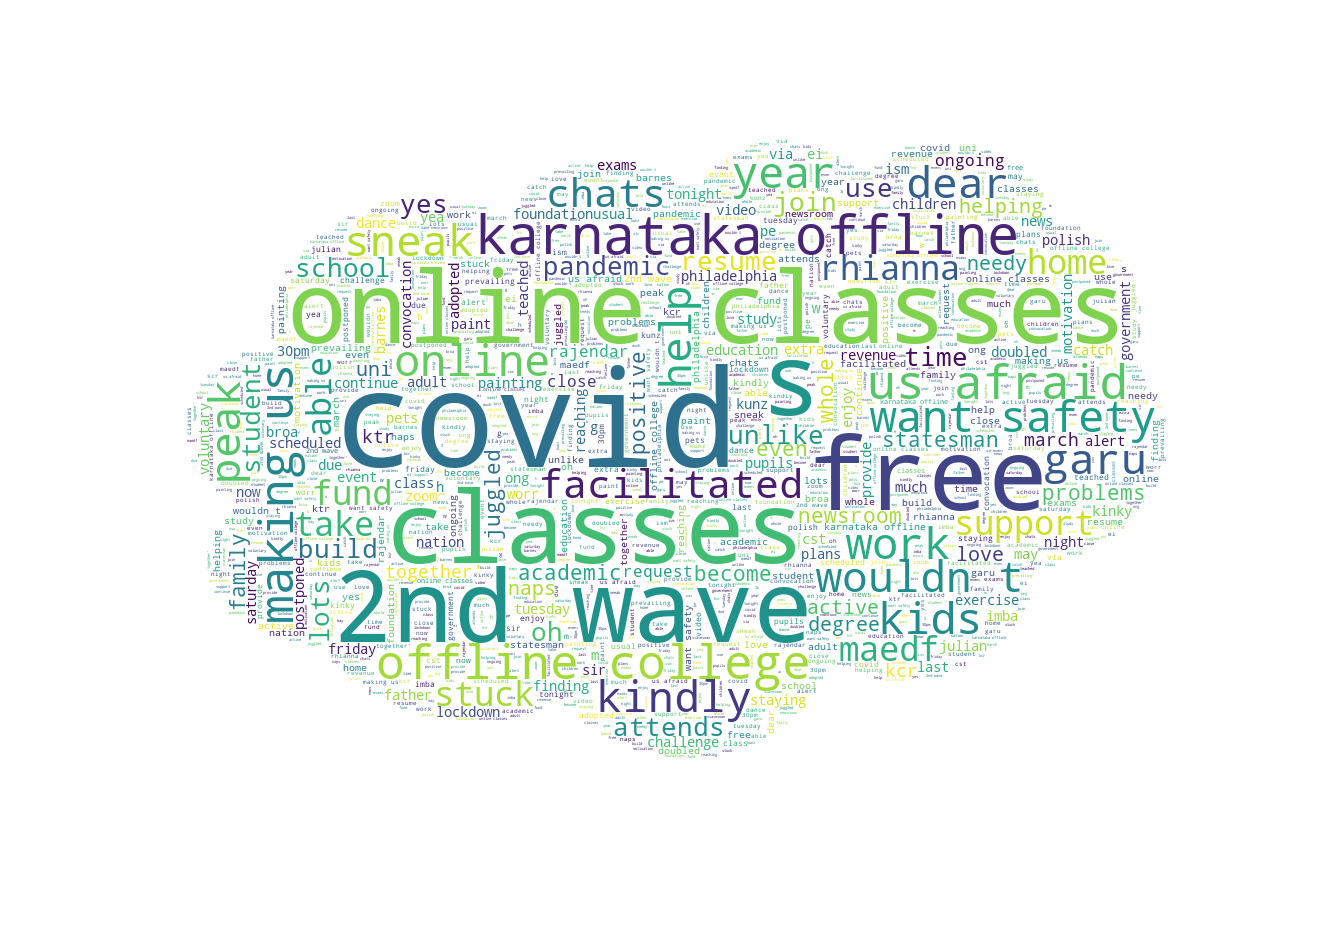

In [15]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


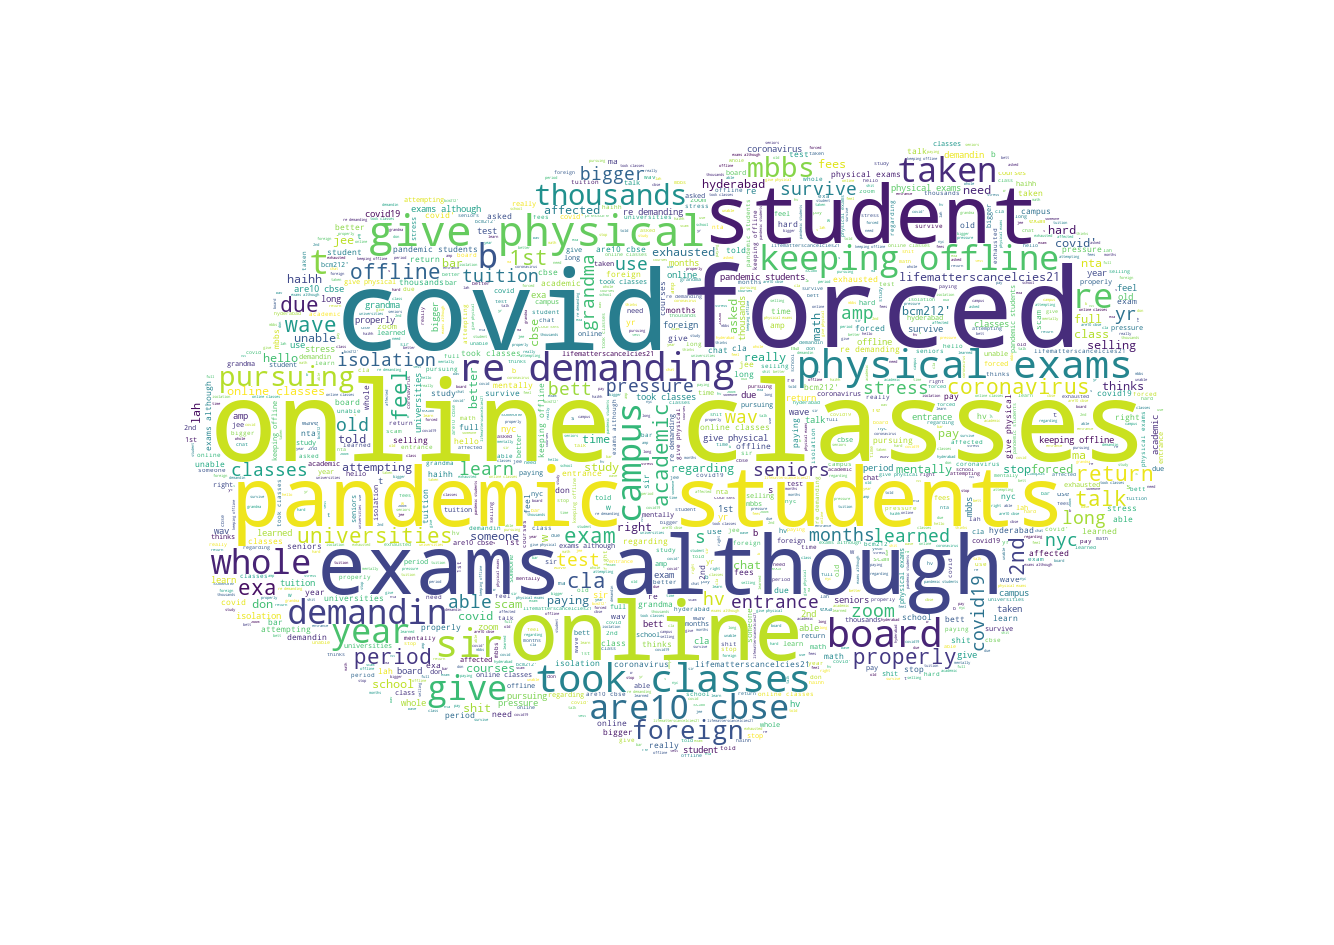

In [16]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


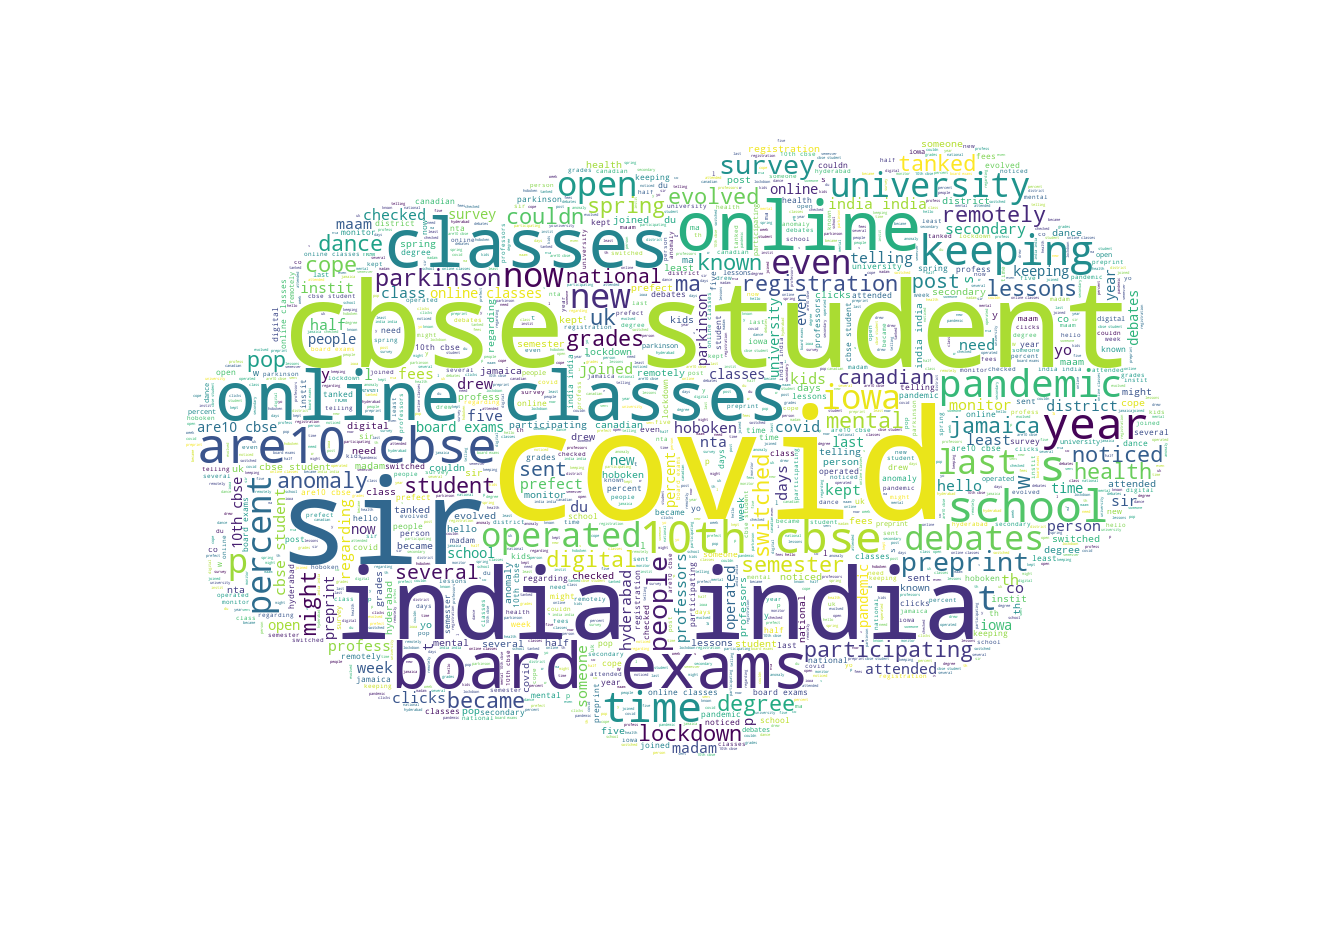

In [17]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

## Text Analytics

### Data Preprocessing 

In [18]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))


#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [19]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))


#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [20]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [21]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized,nonstop,stemmed
0,They have these debates in the UK too. In Jama...,they have these debates in the uk too in jama...,0.00,0.000000,neutral,0.000,1.000,0.0,0.0000,they have these debates in the uk too in jama...,"[they, have, these, debates, in, the, uk, too,...","[debates, uk, jamaica, debates, would, pop, ti...","[debat, uk, jamaica, debat, would, pop, time, ..."
1,"RT @DrNumanOfficial: During pandemic, students...",during pandemic students were forced to give...,-0.15,0.171429,negative,0.244,0.756,0.0,-0.6326,during pandemic students were forced to give...,"[, during, pandemic, students, were, forced, t...","[, pandemic, students, forced, give, physical,...","[, pandem, student, forc, give, physic, exam, ..."
9,"RT @NadeemRahi20: During pandemic, students we...",during pandemic students were forced to give...,-0.15,0.171429,negative,0.233,0.767,0.0,-0.6326,during pandemic students were forced to give...,"[, during, pandemic, students, were, forced, t...","[, pandemic, students, forced, give, physical,...","[, pandem, student, forc, give, physic, exam, ..."
13,"RT @ansa_murtza: During the pandemic, students...",during the pandemic students are forced to g...,-0.05,0.300000,negative,0.136,0.864,0.0,-0.4588,during the pandemic students are forced to g...,"[, during, the, pandemic, students, are, force...","[, pandemic, students, forced, give, campus, e...","[, pandem, student, forc, give, campu, exam, a..."
14,"RT @MujeebMalik055: During pandemic, students ...",during pandemic students were forced to give...,-0.15,0.171429,negative,0.233,0.767,0.0,-0.6326,during pandemic students were forced to give...,"[, during, pandemic, students, were, forced, t...","[, pandemic, students, forced, give, physical,...","[, pandem, student, forc, give, physic, exam, ..."


### Applying Vectorizer

In [22]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

91 Number of tweets have 289 words


In [23]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abl,academ,activ,adopt,adult,affect,afraid,alert,although,...,whole,work,worr,would,ye,yea,year,yo,yr,zoom
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
class,61
onlin,56
covid,50
student,34
exam,30
cbse,18
sir,17
india,15
pandem,15
board,15


In [25]:
tw_text = tw_list['text']
tw_sentiment = tw_list['sentiment']
    


### Training Classifiers 

In [26]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(tw_text, tw_sentiment, test_size=0.2, random_state=30)



### Support Vector Machine

In [27]:
from sklearn.svm import LinearSVC


clf_linearSVC_pipe = Pipeline([
    ('cv', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ("clf_linearSVC", LinearSVC()),  
])

clf_linearSVC_pipe .fit(X_train,y_train)

predictions = clf_linearSVC_pipe .predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.83      0.62      0.71         8
     neutral       0.88      0.88      0.88         8
    positive       0.60      1.00      0.75         3

    accuracy                           0.79        19
   macro avg       0.77      0.83      0.78        19
weighted avg       0.81      0.79      0.79        19



In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(min_df=5), LinearSVC())
param_grid = {"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.82
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 1)}


### Naive Bayes

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('cv', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

pipeline.fit(X_train,y_train)

predictions = pipeline.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.67      0.57      0.62         7
     neutral       0.88      0.70      0.78        10
    positive       0.40      1.00      0.57         2

    accuracy                           0.68        19
   macro avg       0.65      0.76      0.65        19
weighted avg       0.75      0.68      0.70        19



In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(min_df=5),MultinomialNB())
param_grid = {"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.67
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 1)}


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf_randomForest_pipe = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ("clf_randomForest", RandomForestClassifier()),  
])

clf_randomForest_pipe .fit(X_train,y_train)

predictions = clf_randomForest_pipe .predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.83      0.71      0.77         7
     neutral       0.88      0.70      0.78        10
    positive       0.40      1.00      0.57         2

    accuracy                           0.74        19
   macro avg       0.70      0.80      0.71        19
weighted avg       0.81      0.74      0.75        19



In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(min_df=5), RandomForestClassifier())
param_grid = {"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.80
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 2)}


### Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf_decisionTree_pipe = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ("clf_decisionTree", DecisionTreeClassifier()),  
])

clf_decisionTree_pipe.fit(X_train,y_train)

predictions = clf_decisionTree_pipe.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.83      0.71      0.77         7
     neutral       0.88      0.88      0.88         8
    positive       0.60      0.75      0.67         4

    accuracy                           0.79        19
   macro avg       0.77      0.78      0.77        19
weighted avg       0.80      0.79      0.79        19



In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(min_df=5), DecisionTreeClassifier())
param_grid = {"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.75
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 2)}
